In [1]:
# here we will be doing dimensionality reduction with PCA and tSNE on the swiss roll datasets. We'll also visualize it.

import sealion as sl #import first
from sealion.DimensionalityReduction import PCA, tSNE # the 2 dimensionality reduction algorithms
import matplotlib.pyplot as plt # for visualization
from sklearn.datasets import make_swiss_roll  # for getting the data

<function matplotlib.pyplot.show(close=None, block=None)>

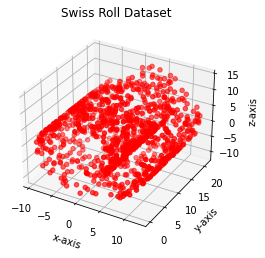

In [2]:
X, _ = make_swiss_roll(1000) # load in a 100 points of the swiss roll dataset, all in 3D

#First we need to visualize this 3D-data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='red', marker='o')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.title('Swiss Roll Dataset')
plt.show

Text(0.5, 1.0, 'Swiss Roll Squish')

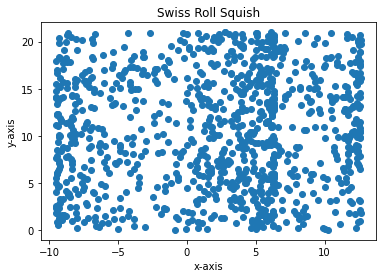

In [3]:
# now let's say that actually I need that data in 2D. But I don't just want to remove the z-axis and squish it,
# because that  wouldn't capture the full dataset very well. 

#here's what squishing looks like : 
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X[:, 0], X[:, 1]) 
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Swiss Roll Squish")

Text(0.5, 1.0, 'Swiss Roll PCA')

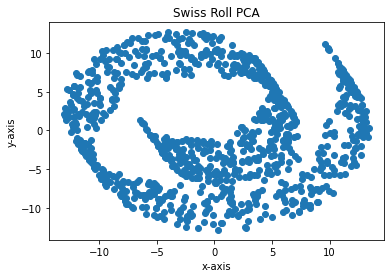

In [4]:
# YUCK! To maintain the structure in lower dimensions, a special type of machine learning
# algorithms known as dimensionality reduction come in to play. Let's have a go at it. 

# the first algorithm we will be trying out is principal component analysis. Here we will be reducing it to 2D.
pca = PCA(2) # 2 because we are transforming it to 2D.
X_2D = pca.transform(X) # runs very fast

# now we can visualize it in 2-Dimensions

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_2D[:, 0], X_2D[:, 1])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Swiss Roll PCA")

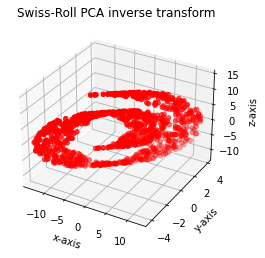

In [5]:
# now if we wanted to do, we could see use the inverse_transform() method in the PCA class and compare it to our
# original, 3D data.

X_3D = pca.inverse_transform(X_2D) # give it the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2], c='red', marker='o')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.title('Swiss-Roll PCA inverse transform')
plt.show()

Text(0.5, 1.0, 'Swiss Roll tSNE')

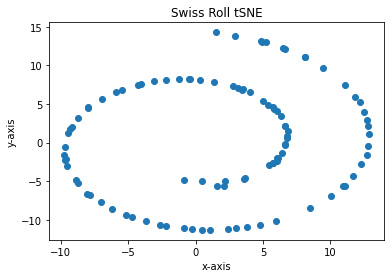

In [6]:
# notice how it looks like a plane. That's because PCA finds linear projections for the data to go onto.

# Our next algorithm is tSNE, which personally for me was one of the hardest in this library to create. tSNE
# struggles with a lot of data, so using bigger processors is usually preferred. 
# It's time complexity for SeaLion is O(n^2) so this may take some time.

tsne = tSNE(2) # 2 dimensions
X_2D = tsne.transform(X[:100]) #we'll just do it for the first 100 points

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_2D[:, 0], X_2D[:, 1])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Swiss Roll tSNE")

# Which one do you like more? tSNE gives the better projection, but takes longer. PCA does it much quicker, but does it much worse. These are the choices you
# will learn to make.